In [1]:
%matplotlib inline
import astropy as ast
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import scipy.ndimage
from astropy.convolution import convolve, convolve_fft
from scipy import optimize
from photutils.psf import create_matching_kernel, TopHatWindow, CosineBellWindow

In [2]:
def gaussian(height, center_x, center_y, width_x, width_y):
    """Returns a gaussian function with the given parameters"""
    width_x = float(width_x)
    width_y = float(width_y)
    return lambda x,y: height*np.exp(
                -(((center_x-x)/width_x)**2+((center_y-y)/width_y)**2)/2)

def moments(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution by calculating its
    moments """
    total = data.sum()
    X, Y = np.indices(data.shape)
    x = (X*data).sum()/total
    y = (Y*data).sum()/total
    col = data[:, int(y)]
    width_x = np.sqrt(np.abs((np.arange(col.size)-x)**2*col).sum()/col.sum())
    row = data[int(x), :]
    width_y = np.sqrt(np.abs((np.arange(row.size)-y)**2*row).sum()/row.sum())
    height = data.max()
    return height, x, y, width_x, width_y

def fitgaussian(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution found by a fit"""
    params = moments(data)
    errorfunction = lambda p: np.ravel(gaussian(*p)(*np.indices(data.shape)) -
                                 data)
    p, success = optimize.leastsq(errorfunction, params)
    return p

In [14]:
image_6563_flux = fits.getdata('/home/selin/Documents/M33/M33 SW/Fits/M33-SW_SN3.1.0.LineMaps.map.6563.1x1.flux.fits')
header_6563_flux = fits.open('/home/selin/Documents/M33/M33 SW/Fits/M33-SW_SN3.1.0.LineMaps.map.6563.1x1.flux.fits')[0].header

image_velocity = fits.getdata('/home/selin/Documents/M33/M33 SW/Fits/M33-SW_SN3.1.0.LineMaps.map.6563.1x1.velocity.fits')
header_velocity = fits.open('/home/selin/Documents/M33/M33 SW/Fits/M33-SW_SN3.1.0.LineMaps.map.6563.1x1.velocity.fits')[0].header

image_4861_flux = fits.getdata('/home/selin/Documents/M33/M33 SW/Fits/M33-SW_SN2.LineMaps.map.4861.1x1.flux.fits')
header_4861_flux = fits.open('/home/selin/Documents/M33/M33 SW/Fits/M33-SW_SN2.LineMaps.map.4861.1x1.flux.fits')[0].header

image_6584_flux = fits.getdata('/home/selin/Documents/M33/M33 SW/Fits/M33-SW_SN3.1.0.LineMaps.map.6583.1x1.flux.fits')
header_6584_flux = fits.open('/home/selin/Documents/M33/M33 SW/Fits/M33-SW_SN3.1.0.LineMaps.map.6583.1x1.flux.fits')[0].header

image_3727_flux = fits.getdata('/home/selin/Documents/M33/M33 SW/Fits/M33-SW_SN1.LineMaps.map.3726.1x1.flux.fits')
header_3727_flux = fits.open('/home/selin/Documents/M33/M33 SW/Fits/M33-SW_SN1.LineMaps.map.3726.1x1.flux.fits')[0].header

image_5007_flux = fits.getdata('/home/selin/Documents/M33/M33 SW/Fits/M33-SW_SN2.LineMaps.map.5007.1x1.flux.fits')
header_5007_flux = fits.open('/home/selin/Documents/M33/M33 SW/Fits/M33-SW_SN2.LineMaps.map.5007.1x1.flux.fits')[0].header

image_6717_flux = fits.getdata('/home/selin/Documents/M33/M33 SW/Fits/M33-SW_SN3.1.0.LineMaps.map.6716.1x1.flux.fits')
header_6717_flux = fits.open('/home/selin/Documents/M33/M33 SW/Fits/M33-SW_SN3.1.0.LineMaps.map.6716.1x1.flux.fits')[0].header

image_6731_flux = fits.getdata('/home/selin/Documents/M33/M33 SW/Fits/M33-SW_SN3.1.0.LineMaps.map.6731.1x1.flux.fits')
header_6731_flux = fits.open('/home/selin/Documents/M33/M33 SW/Fits/M33-SW_SN3.1.0.LineMaps.map.6731.1x1.flux.fits')[0].header

height_SN3 = fits.getdata('/home/selin/Documents/M33/M33 SW/Fits/M33-SW_SN3.1.0.LineMaps.map.all.1x1.height.fits')
height_SN2 = fits.getdata('/home/selin/Documents/M33/M33 SW/Fits/M33-SW_SN2.LineMaps.map.all.1x1.height.fits')
height_SN1 = fits.getdata('/home/selin/Documents/M33/M33 SW/Fits/M33-SW_SN1.LineMaps.map.all.1x1.height.fits')

In [42]:
coorx = 1070
coory = 1020
r = 10

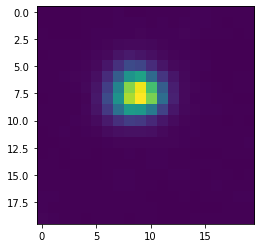

In [43]:
plt.imshow(height_SN3[coorx-r:coorx+r,coory-r:coory+r])

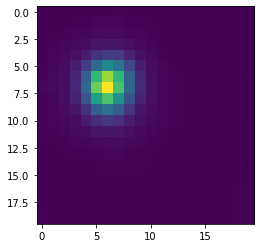

In [44]:
plt.imshow(height_SN2[coorx-r:coorx+r,coory-r:coory+r])

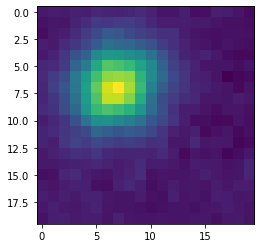

In [45]:
plt.imshow(height_SN1[coorx-r:coorx+r,coory-r:coory+r])

7.537950426672382 8.737943533991887 1.3951103679576753 1.5501432027879922


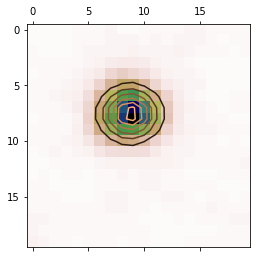

In [46]:
# Create the gaussian data
Xin, Yin = np.mgrid[0:101, 0:101]
data3 = height_SN3[coorx-r:coorx+r,coory-r:coory+r]

plt.matshow(data3, cmap=plt.cm.gist_earth_r)

params = fitgaussian(data3)
fit = gaussian(*params)

plt.contour(fit(*np.indices(data3.shape)), cmap=plt.cm.copper)
ax = plt.gca()
(height3, x3, y3, width_x3, width_y3) = params

print(x3, y3, width_x3, width_y3)

6.836679434474047 5.985230061556775 1.636088994641045 1.4591672078744018


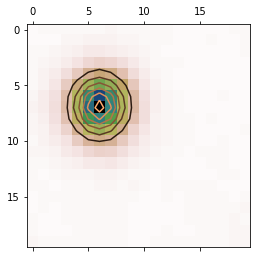

In [47]:
# Create the gaussian data
Xin, Yin = np.mgrid[0:101, 0:101]
data2 = height_SN2[coorx-r:coorx+r,coory-r:coory+r]

plt.matshow(data2, cmap=plt.cm.gist_earth_r)

params = fitgaussian(data2)
fit = gaussian(*params)

plt.contour(fit(*np.indices(data2.shape)), cmap=plt.cm.copper)
ax = plt.gca()
(height2, x2, y2, width_x2, width_y2) = params

print(x2, y2, width_x2, width_y2)

6.9014657212165496 6.747917778882999 2.9015750350444556 2.9097683305687436


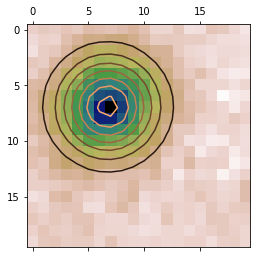

In [48]:
# Create the gaussian data
Xin, Yin = np.mgrid[0:101, 0:101]
data1 = height_SN1[coorx-r:coorx+r,coory-r:coory+r]

plt.matshow(data1, cmap=plt.cm.gist_earth_r)

params = fitgaussian(data1)
fit = gaussian(*params)

plt.contour(fit(*np.indices(data1.shape)), cmap=plt.cm.copper)
ax = plt.gca()
(height1, x1, y1, width_x1, width_y1) = params

print(x1, y1, width_x1, width_y1)

In [49]:
shifted_4861 = scipy.ndimage.shift(image_4861_flux,[x3-x2,y3-y2],order=1)
shifted_5007 = scipy.ndimage.shift(image_5007_flux,[x3-x2,y3-y2],order=1)
shifted_3727 = scipy.ndimage.shift(image_3727_flux,[x3-x1,y3-y1],order=1)

In [50]:
shifted_data2 = scipy.ndimage.shift(data2,[x3-x2,y3-y2],order=1)
shifted_data1 = scipy.ndimage.shift(data1,[x3-x1,y3-y1],order=1)
window = CosineBellWindow(0.35)
kernel_SN23 = create_matching_kernel(data3,shifted_data2, window=window)
kernel_SN12 = create_matching_kernel(shifted_data2,shifted_data1, window=window)

In [51]:
image_OII_flux = shifted_3727
header_OII_flux = header_3727_flux

image_SII_flux = image_6731_flux + image_6717_flux
header_SII_flux = header_6731_flux + header_6717_flux

image_NII_Halpha_flux = image_6584_flux / image_6563_flux

image_ratio_SII_flux = image_6717_flux / image_6731_flux

image_SII_Halpha_flux = image_SII_flux / image_6563_flux

#OIII (SN2) / Hbeta (SN2)

image_OIII_Hbeta_flux = shifted_5007 / shifted_4861

#Halpha (6563) (SN3) / Hbeta (4861) (SN2)

image_4861_conv = convolve_fft(shifted_4861,kernel_SN23)
image_Halpha_Hbeta_flux = image_6563_flux/image_4861_conv

#OIII (5007) (SN2) / OII (SN1)

image_OII_conv = convolve_fft(image_OII_flux,kernel_SN12)
image_OIII_OII_flux = shifted_5007/image_OII_conv


<ipython-input-51-611ffaa35920>:9: RuntimeWarning: invalid value encountered in true_divide
  image_ratio_SII_flux = image_6717_flux / image_6731_flux
<ipython-input-51-611ffaa35920>:15: RuntimeWarning: invalid value encountered in true_divide
  image_OIII_Hbeta_flux = shifted_5007 / shifted_4861
<ipython-input-51-611ffaa35920>:20: RuntimeWarning: divide by zero encountered in true_divide
  image_Halpha_Hbeta_flux = image_6563_flux/image_4861_conv
<ipython-input-51-611ffaa35920>:25: RuntimeWarning: invalid value encountered in true_divide
  image_OIII_OII_flux = shifted_5007/image_OII_conv


In [52]:
image_data = image_OIII_OII_flux
header_data = header_OII_flux
data_no_nan = image_data*1
cond = np.isnan(image_data) == True
cx,cy = np.where(cond)
for i in range(0,len(cx)):
   data_no_nan[cx[i],cy[i]] = np.nanmean(image_data[cx[i]-1:cx[i]+1,cy[i]-1:cy[i]+1])
fits.writeto('NoNan_OIII_OII.fits',data=data_no_nan, header = header_data)

hdu = fits.PrimaryHDU(data_no_nan)
hdul = fits.HDUList([hdu])

<ipython-input-52-fbff7ee0e37d>:7: RuntimeWarning: Mean of empty slice
  data_no_nan[cx[i],cy[i]] = np.nanmean(image_data[cx[i]-1:cx[i]+1,cy[i]-1:cy[i]+1])


In [53]:
image_data = image_6563_flux
header_data = header_6563_flux
data_no_nan = image_data*1
cond = np.isnan(image_data) == True
cx,cy = np.where(cond)
for i in range(0,len(cx)):
   data_no_nan[cx[i],cy[i]] = np.nanmean(image_data[cx[i]-1:cx[i]+1,cy[i]-1:cy[i]+1])
fits.writeto('NoNan_6563.fits',data=data_no_nan, header = header_data)

hdu = fits.PrimaryHDU(data_no_nan)
hdul = fits.HDUList([hdu])

<ipython-input-53-518c5d7faed4>:7: RuntimeWarning: Mean of empty slice
  data_no_nan[cx[i],cy[i]] = np.nanmean(image_data[cx[i]-1:cx[i]+1,cy[i]-1:cy[i]+1])


In [54]:
image_data = image_6584_flux
header_data = header_6584_flux
data_no_nan = image_data*1
cond = np.isnan(image_data) == True
cx,cy = np.where(cond)
for i in range(0,len(cx)):
   data_no_nan[cx[i],cy[i]] = np.nanmean(image_data[cx[i]-1:cx[i]+1,cy[i]-1:cy[i]+1])
fits.writeto('NoNan_6584.fits',data=data_no_nan, header = header_data)

hdu = fits.PrimaryHDU(data_no_nan)
hdul = fits.HDUList([hdu])

<ipython-input-54-72bb7460d81a>:7: RuntimeWarning: Mean of empty slice
  data_no_nan[cx[i],cy[i]] = np.nanmean(image_data[cx[i]-1:cx[i]+1,cy[i]-1:cy[i]+1])


In [55]:
image_data = shifted_4861
header_data = header_4861_flux
data_no_nan = image_data*1
cond = np.isnan(image_data) == True
cx,cy = np.where(cond)
for i in range(0,len(cx)):
   data_no_nan[cx[i],cy[i]] = np.nanmean(image_data[cx[i]-1:cx[i]+1,cy[i]-1:cy[i]+1])
fits.writeto('NoNan_4861.fits',data=data_no_nan, header = header_data)

hdu = fits.PrimaryHDU(data_no_nan)
hdul = fits.HDUList([hdu])

<ipython-input-55-79fe51bc2f4d>:7: RuntimeWarning: Mean of empty slice
  data_no_nan[cx[i],cy[i]] = np.nanmean(image_data[cx[i]-1:cx[i]+1,cy[i]-1:cy[i]+1])


In [56]:
image_data = image_OII_flux
header_data = header_OII_flux
data_no_nan = image_data*1
cond = np.isnan(image_data) == True
cx,cy = np.where(cond)
for i in range(0,len(cx)):
   data_no_nan[cx[i],cy[i]] = np.nanmean(image_data[cx[i]-1:cx[i]+1,cy[i]-1:cy[i]+1])
fits.writeto('NoNan_OII.fits',data=data_no_nan, header = header_data)

hdu = fits.PrimaryHDU(data_no_nan)
hdul = fits.HDUList([hdu])

<ipython-input-56-fa33be05d489>:7: RuntimeWarning: Mean of empty slice
  data_no_nan[cx[i],cy[i]] = np.nanmean(image_data[cx[i]-1:cx[i]+1,cy[i]-1:cy[i]+1])


In [57]:
image_data = shifted_5007
header_data = header_5007_flux
data_no_nan = image_data*1
cond = np.isnan(image_data) == True
cx,cy = np.where(cond)
for i in range(0,len(cx)):
   data_no_nan[cx[i],cy[i]] = np.nanmean(image_data[cx[i]-1:cx[i]+1,cy[i]-1:cy[i]+1])
fits.writeto('NoNan_5007.fits',data=data_no_nan, header = header_data)

hdu = fits.PrimaryHDU(data_no_nan)
hdul = fits.HDUList([hdu])

<ipython-input-57-70175d918440>:7: RuntimeWarning: Mean of empty slice
  data_no_nan[cx[i],cy[i]] = np.nanmean(image_data[cx[i]-1:cx[i]+1,cy[i]-1:cy[i]+1])


In [58]:
image_data = image_SII_flux
header_data = header_SII_flux
data_no_nan = image_data*1
cond = np.isnan(image_data) == True
cx,cy = np.where(cond)
for i in range(0,len(cx)):
   data_no_nan[cx[i],cy[i]] = np.nanmean(image_data[cx[i]-1:cx[i]+1,cy[i]-1:cy[i]+1])
fits.writeto('NoNan_SII.fits',data=data_no_nan, header = header_data)

hdu = fits.PrimaryHDU(data_no_nan)
hdul = fits.HDUList([hdu])

<ipython-input-58-c7f4cf5ca991>:7: RuntimeWarning: Mean of empty slice
  data_no_nan[cx[i],cy[i]] = np.nanmean(image_data[cx[i]-1:cx[i]+1,cy[i]-1:cy[i]+1])


In [59]:
image_data = image_NII_Halpha_flux
header_data = header_6563_flux
data_no_nan = image_data*1
cond = np.isnan(image_data) == True
cx,cy = np.where(cond)
for i in range(0,len(cx)):
   data_no_nan[cx[i],cy[i]] = np.nanmean(image_data[cx[i]-1:cx[i]+1,cy[i]-1:cy[i]+1])
fits.writeto('NoNan_NII_Halpha.fits',data=data_no_nan, header = header_data)

hdu = fits.PrimaryHDU(data_no_nan)
hdul = fits.HDUList([hdu])

<ipython-input-59-ec3aa3748d6a>:7: RuntimeWarning: Mean of empty slice
  data_no_nan[cx[i],cy[i]] = np.nanmean(image_data[cx[i]-1:cx[i]+1,cy[i]-1:cy[i]+1])


In [60]:
image_data = image_SII_Halpha_flux
header_data = header_6563_flux
data_no_nan = image_data*1
cond = np.isnan(image_data) == True
cx,cy = np.where(cond)
for i in range(0,len(cx)):
   data_no_nan[cx[i],cy[i]] = np.nanmean(image_data[cx[i]-1:cx[i]+1,cy[i]-1:cy[i]+1])
fits.writeto('NoNan_SII_Halpha.fits',data=data_no_nan, header = header_data)

hdu = fits.PrimaryHDU(data_no_nan)
hdul = fits.HDUList([hdu])

<ipython-input-60-13851ff37ca6>:7: RuntimeWarning: Mean of empty slice
  data_no_nan[cx[i],cy[i]] = np.nanmean(image_data[cx[i]-1:cx[i]+1,cy[i]-1:cy[i]+1])


In [61]:
image_data = image_ratio_SII_flux
header_data = header_SII_flux
data_no_nan = image_data*1
cond = np.isnan(image_data) == True
cx,cy = np.where(cond)
for i in range(0,len(cx)):
   data_no_nan[cx[i],cy[i]] = np.nanmean(image_data[cx[i]-1:cx[i]+1,cy[i]-1:cy[i]+1])
fits.writeto('NoNan_SII_ratio.fits',data=data_no_nan, header = header_data)

hdu = fits.PrimaryHDU(data_no_nan)
hdul = fits.HDUList([hdu])

<ipython-input-61-d8b468015e1b>:7: RuntimeWarning: Mean of empty slice
  data_no_nan[cx[i],cy[i]] = np.nanmean(image_data[cx[i]-1:cx[i]+1,cy[i]-1:cy[i]+1])


In [62]:
image_data = image_OIII_Hbeta_flux
header_data = header_4861_flux
data_no_nan = image_data*1
cond = np.isnan(image_data) == True
cx,cy = np.where(cond)
for i in range(0,len(cx)):
   data_no_nan[cx[i],cy[i]] = np.nanmean(image_data[cx[i]-1:cx[i]+1,cy[i]-1:cy[i]+1])
fits.writeto('NoNan_OIII_Hbeta.fits',data=data_no_nan, header = header_data)

hdu = fits.PrimaryHDU(data_no_nan)
hdul = fits.HDUList([hdu])

<ipython-input-62-54f57127e470>:7: RuntimeWarning: Mean of empty slice
  data_no_nan[cx[i],cy[i]] = np.nanmean(image_data[cx[i]-1:cx[i]+1,cy[i]-1:cy[i]+1])


In [63]:
image_data = image_Halpha_Hbeta_flux
header_data = header_4861_flux
data_no_nan = image_data*1
cond = np.isnan(image_data) == True
cx,cy = np.where(cond)
for i in range(0,len(cx)):
   data_no_nan[cx[i],cy[i]] = np.nanmean(image_data[cx[i]-1:cx[i]+1,cy[i]-1:cy[i]+1])
fits.writeto('NoNan_Halpha_Hbeta.fits',data=data_no_nan, header = header_data)

hdu = fits.PrimaryHDU(data_no_nan)
hdul = fits.HDUList([hdu])

<ipython-input-63-814936646291>:7: RuntimeWarning: Mean of empty slice
  data_no_nan[cx[i],cy[i]] = np.nanmean(image_data[cx[i]-1:cx[i]+1,cy[i]-1:cy[i]+1])


In [64]:
image_4959_flux = fits.getdata('/home/selin/Documents/M33/M33 SW/Fits/M33-SW_SN2.LineMaps.map.4959.1x1.flux.fits')
header_4959_flux = fits.open('/home/selin/Documents/M33/M33 SW/Fits/M33-SW_SN2.LineMaps.map.4959.1x1.flux.fits')[0].header

In [65]:
shifted_4959 = scipy.ndimage.shift(image_4959_flux,[x3-x2,y3-y2],order=1)

In [66]:
image_data = shifted_4959
header_data = header_4959_flux
data_no_nan = image_data*1
cond = np.isnan(image_data) == True
cx,cy = np.where(cond)
for i in range(0,len(cx)):
   data_no_nan[cx[i],cy[i]] = np.nanmean(image_data[cx[i]-1:cx[i]+1,cy[i]-1:cy[i]+1])
fits.writeto('NoNan_4959.fits',data=data_no_nan, header = header_data)

hdu = fits.PrimaryHDU(data_no_nan)
hdul = fits.HDUList([hdu])

<ipython-input-66-aae8bebcd9be>:7: RuntimeWarning: Mean of empty slice
  data_no_nan[cx[i],cy[i]] = np.nanmean(image_data[cx[i]-1:cx[i]+1,cy[i]-1:cy[i]+1])
